In [2]:
# should be (50, 18, 512) if opt_all_layers 
    
    # create noise vectors!! 
    # clmr preds shape is (len_song, 50)

In [2]:
latents = torch.rand(50, 18, 512)

In [3]:
preds = torch.rand(5000, 50)

In [4]:
mult = torch.stack([(pred.view(50, 1, 1) * latents).mean(dim=0) for pred in preds])
#agg = mult.mean(dim=1).shape

In [6]:
mult.unsqueeze(1).shape

torch.Size([5000, 1, 18, 512])

torch.Size([5000, 18, 512])

In [7]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def inv_sig(out):
    return -torch.log((1 / out) - 1)

In [12]:
preds = torch.load("clmr_preds.pt")


In [13]:
preds.shape

torch.Size([6689, 50])

In [17]:
(preds[0] * 100).int()

tensor([ 0, 53, 18,  0,  6,  0,  0,  0,  0,  1,  1,  0,  5,  0,  0,  0,  0,  8,
         0,  0,  0,  1,  0,  0, 19,  1,  0,  0,  0,  0, 22,  0,  1,  0,  6,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       dtype=torch.int32)

In [34]:
softmaxed = torch.softmax(preds / 1, dim=-1)
(softmaxed[0] * 100).int()

tensor([1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1], dtype=torch.int32)

In [35]:
b = torch.arange(50)

In [37]:
(preds[0] * b).sum(dim=0)

tensor(20.2830)

In [313]:
henne = torch.load("clmr_preds_henne_sigmoid.pt")
gnossi = torch.load("clmr_preds_gnossi_sigmoid.pt")
tags = np.array(torch.load("clmr_tags.pt"))

In [314]:
henne_mean = henne.mean(dim=0)
henne_std = henne.std(dim=0)
gnossi_mean = gnossi.mean(dim=0) 
gnossi_std = gnossi.std(dim=0) 

In [315]:
df = pd.DataFrame({"henne_mean": henne_mean, "henne_std": henne_std, "gnossi_mean": gnossi_mean, "gnossi_std": gnossi_std, "tag": tags})
df["diff_mean"] = df["henne_mean"] - df["gnossi_mean"]
df["diff_std"] = df["henne_std"] - df["gnossi_std"]

In [316]:
df.sort_values("henne_mean")

,henne_mean,henne_std,gnossi_mean,gnossi_std,tag,diff_mean,diff_std
47,0.012183,0.038797,0.007013,0.020422,metal,0.005170,0.018376
49,0.015762,0.048787,0.007777,0.020199,choral,0.007986,0.028588
35,0.018920,0.053863,0.010440,0.027720,choir,0.008480,0.026143
38,0.019472,0.044677,0.012698,0.022835,dance,0.006774,0.021843
43,0.020738,0.055465,0.013025,0.030317,cello,0.007713,0.025148
42,0.022167,0.050502,0.016210,0.030934,harp,0.005957,0.019568
46,0.022925,0.055099,0.015708,0.033492,country,0.007217,0.021607
41,0.024427,0.049771,0.016792,0.025142,beats,0.007635,0.024630
34,0.025552,0.049969,0.020684,0.031547,classic,0.004868,0.018421
48,0.031404,0.054489,0.026010,0.034542,female voice,0.005393,0.019947


In [317]:
smooth_frac = 0.005
smooth_range = int(len(henne) * smooth_frac)
smooth_henne = torch.stack([torch.mean(henne[i: i + smooth_range], dim=0) for i in range(len(henne - smooth_range))])
smooth_range = int(len(gnossi) * smooth_frac)
smooth_gnossi = torch.stack([torch.mean(gnossi[i: i + smooth_range], dim=0) for i in range(len(gnossi - smooth_range))])

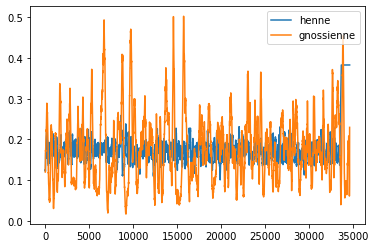

In [318]:
tag = "guitar"
mask = tags == tag
extract = smooth_henne[:, mask].squeeze()
p = plt.plot(extract, label="henne")
#p = plt.ylim(0, 1)

extract = smooth_gnossi[:, mask].squeeze()
x_coords = np.arange(len(gnossi)) * (len(henne) / len(gnossi))
p = plt.plot(x_coords, extract, label="gnossienne")
plt.legend()
#p = plt.ylim(0, 1)

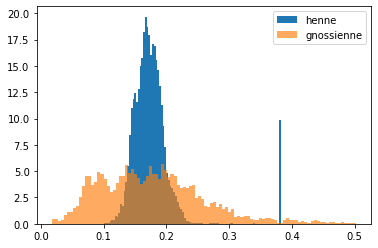

In [319]:
extract = smooth_henne[:, mask].squeeze().numpy()
p = plt.hist(extract, label="henne", bins=100, density=True, alpha=1.0)

extract = smooth_gnossi[:, mask].squeeze().numpy()
p = plt.hist(extract, label="gnossienne", bins=100, density=True, alpha=0.66)
plt.legend()

In [320]:
gnossi[100].mul(100).int()

tensor([ 8,  2,  0, 36,  1,  3,  9,  6, 60,  4,  0,  2,  0,  8,  1, 17,  1,  0,
         2,  4,  9,  2,  3,  7,  0,  0, 11,  2,  3,  2,  0,  0,  0,  1,  0,  0,
         4,  0,  5,  1,  8,  0,  1,  0,  1,  1,  0,  1,  3,  0],
       dtype=torch.int32)

In [321]:
tags

array(['guitar', 'classical', 'slow', 'techno', 'strings', 'drums',
       'electronic', 'rock', 'fast', 'piano', 'ambient', 'beat', 'violin',
       'vocal', 'synth', 'female', 'indian', 'opera', 'male', 'singing',
       'vocals', 'no vocals', 'harpsichord', 'loud', 'quiet', 'flute',
       'woman', 'male vocal', 'no vocal', 'pop', 'soft', 'sitar', 'solo',
       'man', 'classic', 'choir', 'voice', 'new age', 'dance',
       'male voice', 'female vocal', 'beats', 'harp', 'cello', 'no voice',
       'weird', 'country', 'metal', 'female voice', 'choral'],
      dtype='<U12')